# Analytic Optimization

### a)

Compute first and second derivative: 

$$

f(x) = (1 - \frac{1}{2}x^2)* exp(-\frac{1}{2}x^2)

\\[12pt]

f'(x) = (1 - \frac{1}{2}x^2) * -x * exp(-\frac{1}{2}x^2) - x * exp(-\frac{1}{2}x^2)

\\[12pt]

= -(2 - \frac{1}{2}x^2) * x * exp(-\frac{1}{2}x^2)

\\[12pt]

f''(x) = 2x^2*exp(-\frac{1}{2}x^2) - 2exp(-\frac{1}{2}x^2) + -\frac{1}{2}x^4*exp(-\frac{1}{2}x^2)+\frac{3}{2}x^2*exp(-\frac{1}{2}x^2)

\\[12pt]

= (2x^2-2-\frac{1}{2}x^4+\frac{3}{2}x^2) * exp(-\frac{1}{2}x^2)

\\[12pt]

= (3.5x^2-2-\frac{1}{2}x^4) * exp(-\frac{1}{2}x^2)

\\[12pt]

= (7x^2-4-x^4) * \frac{1}{2}exp(-\frac{1}{2}x^2)

\\[12pt]

$$

### b)

For doing that we can split the first derivative into two parts. We can set the first part to 0 and then the second to get all local extremas:

$$

-(2 - \frac{1}{2}x^2) * x * exp(-\frac{1}{2}x^2) = 0

\\[12pt]

First:

\\[12pt]

-2 + \frac{1}{2}x^2 = 0

\\[12pt]

\frac{1}{2}x^2 = 2

\\[12pt]

x^2 = 4

\\[12pt]

x_1 = 2

\\[12pt]

x_2 = -2

\\[12pt]

Second: 

\\[12pt]

x * exp(-\frac{1}{2}x^2) = 0

\\[12pt]

x_3 = 0

$$

### c)

$$

f''(0) = -4 * \frac{1}{2} * exp(-\frac{1}{2}*x^2)

\\[12pt]

= -2*exp(0)

\\[12pt]

= -2

\\[12pt]

f''(2) = (28 - 4 - 16) * \frac{1}{2}exp(-\frac{1}{2}*4)

\\[12pt]

= 4*exp(-2) > 0

\\[12pt]

f''(-2) = (28 - 4 - 16) * \frac{1}{2}exp(-\frac{1}{2}*4)

\\[12pt]

= 4*exp(-2) > 0

\\[12pt]

$$

As we can see, from our 3 points $x_1 = 2, x_2 = -2, x_3 = 0$ we have found out that $x_1$ is a maxima and the other two are local minimas.

### d)

$$

\lim_{{x \to +\infty}} (1-\frac{1}{2}x^2) * exp(-\frac{1}{2}*x^2) = 0

\\[12pt]

\lim_{{x \to -\infty}} (1-\frac{1}{2}x^2) * exp(-\frac{1}{2}*x^2) = 0

$$

Since the exp term always goes towards 0 when looking at its development towards infinity, the whole term will turn into 0.

# Geometric Gradients

# Gradient Based Optimization

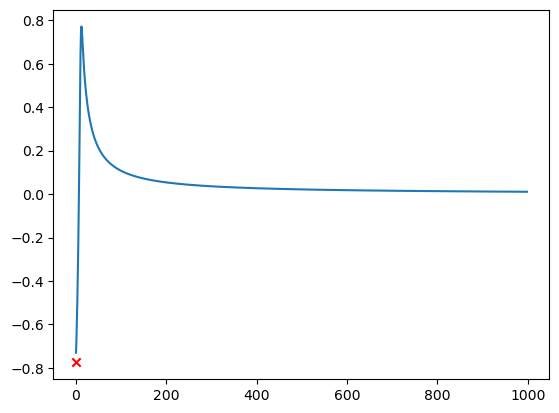

In [26]:
import matplotlib.pyplot as plt
import math
import sympy as sp
import numpy as np


t_values = np.arange(0.1, 100, 0.1)

x = sp.symbols('x')

fn = sp.tanh((x+1)*(x-0.8)*(x+0.1))

df = sp.diff(fn, x)

def f(x):
    return math.tanh((x+1)*(x-0.8)*(x+0.1))

def d(t):
    return (f(t) - f(0)) / t

plt.plot([d(t) for t in t_values])

plt.scatter(x=0, y=df.subs(x, 0), marker="x", c="red")

The values close to 0 fall down towards around -0.8. After that they rapidly go up towards 0.8 and then there is a steady decline towards 0. 

Why? 

Given the function, the values can only be negative when being below 0.8 since the function only reaches negative values due to this part of the function (x-0.8). This means the value has to be ATLEAST smaller than 0.8.

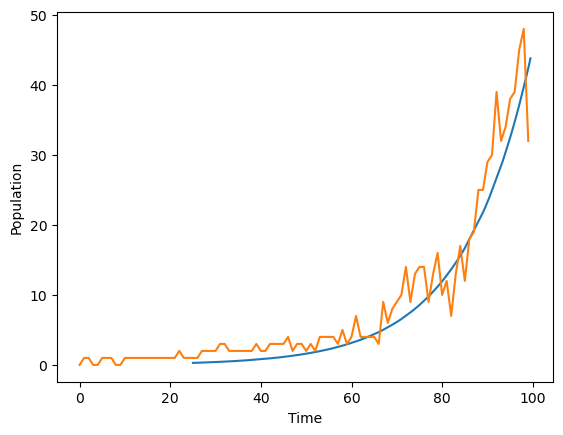

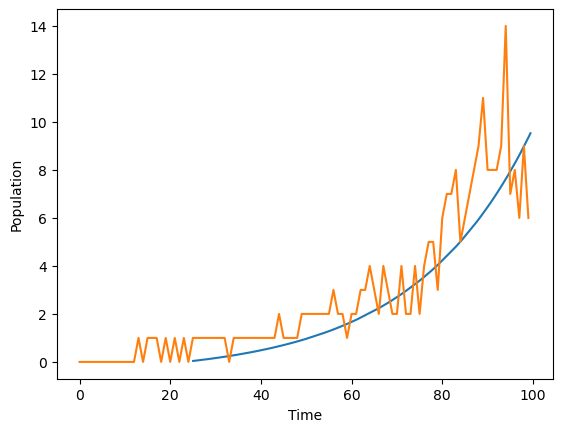

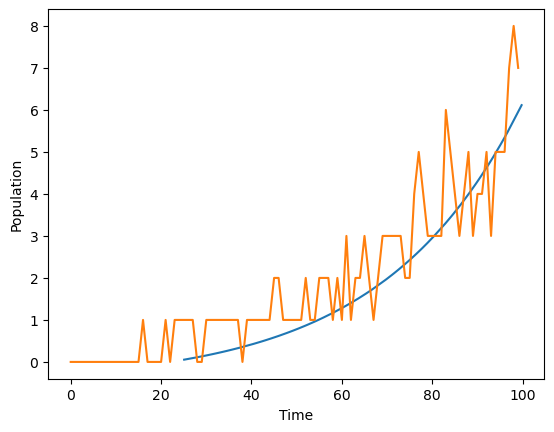

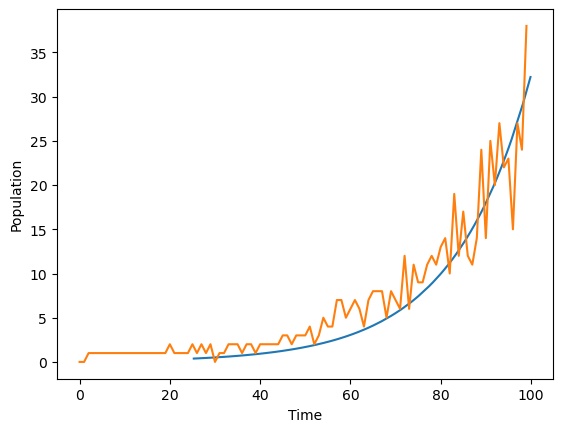

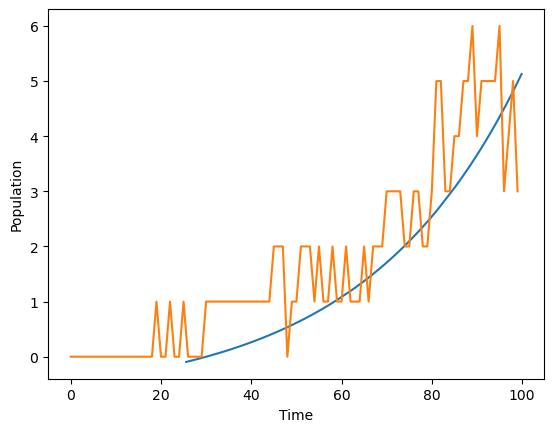

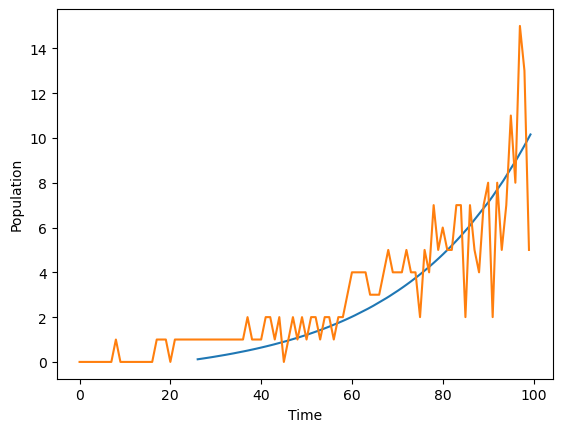

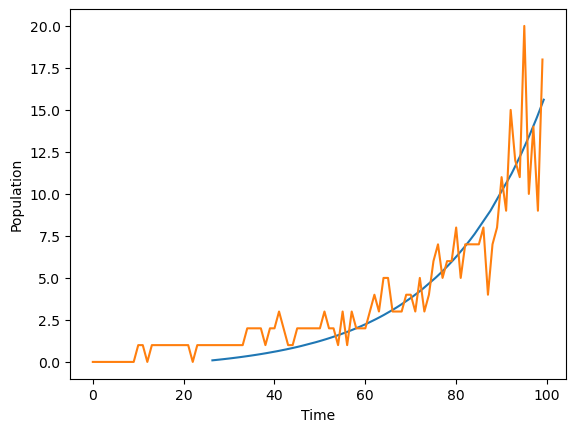

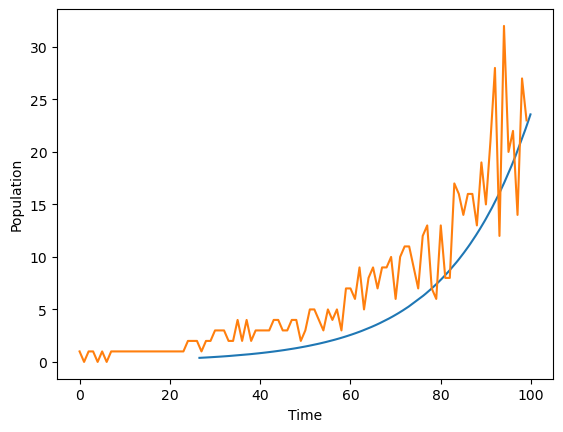

In [173]:
import numpy as np
import math
from scipy.optimize import minimize
import matplotlib.pyplot as plt

data = np.loadtxt("population.csv", skiprows=1, delimiter=",")

x0 = [abs(np.random.normal())] * 3

grouped_data = {}

for item in data:
    island_id = item[1] 
    if island_id not in grouped_data:
        grouped_data[island_id] = [] 
    grouped_data[island_id].append(list(item))


def probFunc(r, c, k, t):
    return k*math.exp(r*t)-(c/r)

def mse(params, t, real):
    r, c, k = params 
    predicted_values = np.array([probFunc(r, c, k, t_i) for t_i in t])
    mse = np.mean((predicted_values - real) ** 2)
    return mse

parameter_bounds = [(0.001, None), (0.001, None), (0.001, None)]

for key, items in grouped_data.items():
   times = []
   pop = []
   for i in items:
       times.append(i[0])
       pop.append(i[2])
   result = minimize(mse,x0, args=(times, pop), bounds=parameter_bounds)
   optimized_r = result.x[0]
   optimized_c = result.x[1]
   optimized_k = result.x[2]
   optimizedvalues = []
   for t in times:
       optimizedvalues.append(probFunc(float(optimized_r), float(optimized_c), float(optimized_k), t))
   plt.plot(times, optimizedvalues)
   plt.plot(pop)
   plt.xlabel("Time")
   plt.ylabel("Population")
   plt.show()
        
# Plaise click öfter because error